<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_51_MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras with MNIST dataset

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Data load

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape, test_images.shape)
print(train_labels.shape, test_labels.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
train_images[0].max()   # 8-bit

255

In [ ]:
type(train_images), type(train_images[0]), train_images[0].shape

(numpy.ndarray, numpy.ndarray, (28, 28))

In [ ]:
type(train_labels), type(train_labels[0]), train_labels[0]

(numpy.ndarray, numpy.uint8, 5)

In [ ]:
train_images.shape, train_labels.dtype

((60000, 28, 28), dtype('uint8'))

## MNIST image and Preprocessing

<function matplotlib.pyplot.show(*args, **kw)>

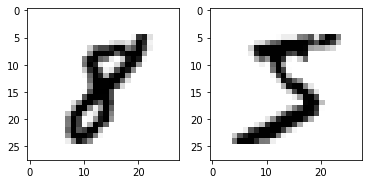

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(1,2,1)
plt.imshow(train_images[17], cmap=plt.cm.binary)   # 'binary' and 'gray' are different colormaps
plt.subplot(1,2,2)
plt.imshow(train_images[0]/255, cmap=plt.cm.binary)
plt.show

In [ ]:
# just for checking
print(type(train_labels), train_labels[:10])
train_images.shape, train_labels.shape

<class 'numpy.ndarray'> [5 0 4 1 9 2 1 3 1 4]


((60000, 28, 28), (60000,))

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28, 1), (60000, 10))

In [ ]:
print(train_labels[:10], type(train_labels), )

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] <class 'numpy.ndarray'>


## MLP

### Single flattened layer

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape((10000, 28*28*1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [ ]:
# a single MLP layer

model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape = (28*28*1, )))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer= opt,
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=128, verbose=2)

test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

Epoch 1/30
469/469 - 2s - loss: 0.3758 - accuracy: 0.8939 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 1s - loss: 0.3076 - accuracy: 0.9154 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.2998 - accuracy: 0.9188 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.2972 - accuracy: 0.9198 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.2947 - accuracy: 0.9211 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.2929 - accuracy: 0.9222 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.2919 - accuracy: 0.9228 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.2921 - accuracy: 0.9235 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s - loss: 0.2907 - accuracy: 0.9241 - 1s/epoch - 3ms/step
Epoch 10/30
469/469 - 1s - loss: 0.2885 - accuracy: 0.9245 - 1s/epoch - 3ms/step
Epoch 11/30
469/469 - 1s - loss: 0.2883 - accuracy: 0.9248 - 1s/epoch - 3ms/step
Epoch 12/30
469/469 - 1s - loss: 0.2889 - accuracy: 0.9256 - 1s/epoch - 3ms/step
Epoch 13/30
469/469 - 1s - loss: 0.28

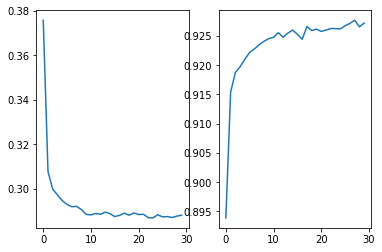

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

(28, 28)


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

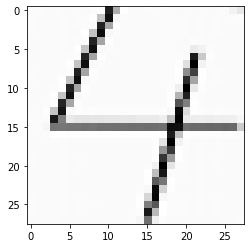

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('num_4_thin.png' ).convert('LA')
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28*28))

### MLP with hidden layers

In [ ]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape = (28*28*1, ))) # fully-connected
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='dense_3_input'), name='dense_3_input', description="created by layer 'dense_3_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_5/Softmax:0', description="created by layer 'dense_5'")


In [ ]:
print(model.input_shape)
print(model.output_shape)
model.input

(None, 784)
(None, 10)


<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_3_input')>

In [ ]:
model.layers[0].input, model.layers[0].output, model.layers[0].trainable

(<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_3_input')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_3')>,
 True)

In [ ]:
model.compile(optimizer= 'rmsprop',             # default lr=0.001 (알고리즘마다 다름)
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30, batch_size=200)

Epoch 1/30
300/300 [==============================] - 2s 5ms/step - loss: 0.3613 - accuracy: 0.8972
Epoch 2/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1645 - accuracy: 0.9519
Epoch 3/30
300/300 [==============================] - 1s 4ms/step - loss: 0.1160 - accuracy: 0.9657
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0891 - accuracy: 0.9730
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0723 - accuracy: 0.9778
Epoch 6/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9823
Epoch 7/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0490 - accuracy: 0.9848
Epoch 8/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0415 - accuracy: 0.9873
Epoch 9/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 10/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9907

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels) # default batch size=32
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1369 - accuracy: 0.9774
test_acc =  0.977400004863739


## CNN

In [ ]:
# keras.layers.Conv2D(filters, kernel_size,...)
# - filters: the dimensionality of the output space (the number of output filters).
# - parameter 수: 입력채널수 X 필터폭 X 필터높이 X 출력채널수
# - bias 도 고려

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32')/255         # scaling

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)   # one-hot encoding
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
# print(model.output_shape)

model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
print(model.output_shape)

model.summary()

(None, 10)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)   

In [ ]:
# number of parameters
# conv2d_1 : 3*3*1*32 + 32 = 320
# conv2d_2 : 3*3*32*64 + 64 = 18496
# conv2d_3 : 3*3*64*64 + 64 = 36928
# dense_6 : 3*3*64*10 + 10 = 5770

In [ ]:
model.compile(optimizer= 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=30, batch_size=200)

Epoch 1/30
300/300 [==============================] - 33s 15ms/step - loss: 0.3032 - accuracy: 0.9084
Epoch 2/30
300/300 [==============================] - 4s 15ms/step - loss: 0.0751 - accuracy: 0.9772
Epoch 3/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0491 - accuracy: 0.9853
Epoch 4/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0368 - accuracy: 0.9885
Epoch 5/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 6/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0239 - accuracy: 0.9923
Epoch 7/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 8/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 9/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0139 - accuracy: 0.9957
Epoch 10/30
300/300 [==============================] - 4s 14ms/step - loss: 0.0121 - accur

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc = ',test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0618 - accuracy: 0.9914
test_acc =  0.9914000034332275


(28, 28)


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

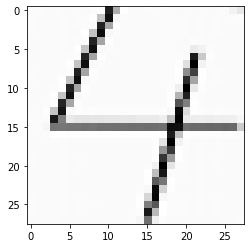

In [ ]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image = Image.open('num_4_thin.png' ).convert('LA')  # to gray
image = ImageOps.grayscale(image)
image = np.asarray(image.resize((28,28)))
image = 255. - image
plt.imshow(image, cmap='Greys')
print(np.asarray(image).shape)
# model.predict(image.reshape(1, 28,28,1).astype('float64') / 255)
model.predict(image.reshape(1, 28,28,1))

## Without Deep Learning

In [10]:
# just for reference
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28*1))
test_images = test_images.reshape((10000, 28*28*1))

X_train = train_images.astype('float32')/255.         # scaling
X_test  = test_images.astype('float32')/255.
y_train, y_test = train_labels, test_labels


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [12]:
clf = SGDClassifier(max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.914


-------------- end ---------------------